### 3.2.2 Резонанс напряжений в последовательном контуре

In [1]:
import pandas as pd
import numpy as np
import mygraph as mg

filename = 'table.tsv'
df = pd.read_csv(filename,sep='\t')
df.index = np.arange(1,8)
df['L, мкГн'] = np.zeros_like(df.index)
df['Q'] = np.zeros_like(df.index)
df['p, Ом'] = np.zeros_like(df.index)
df['R_sum, Ом'] = np.zeros_like(df.index)
df['R_s_max, Ом'] = np.zeros_like(df.index)
df['R_L, Ом'] = np.zeros_like(df.index)
df['I, мА'] = np.zeros_like(df.index)
df['U, V'] *= np.sqrt(2) # см. тетрадь
df

,"C, нФ","f, kHz","U, V","E, V","L, мкГн",Q,"p, Ом","R_sum, Ом","R_s_max, Ом","R_L, Ом","I, мА"
1,25.0,31.272,8.688928,0.2511,0,0,0,0,0,0,0
2,33.2,27.313,7.607055,0.2510,0,0,0,0,0,0,0
3,47.5,22.864,6.702524,0.2511,0,0,0,0,0,0,0
4,57.2,20.898,6.018893,0.2509,0,0,0,0,0,0,0
5,67.4,19.330,5.333706,0.2507,0,0,0,0,0,0,0
6,82.1,17.535,5.265400,0.2506,0,0,0,0,0,0,0
7,99.6,15.955,4.977042,0.2506,0,0,0,0,0,0,0


In [2]:
import numpy as np
def L(C, nu):
    ''' [w] = kHz, [C] = nF => [L] = кГн '''
    w = 2 * np.pi * nu
    return ( 1 / (w*w*C) ) * 1e9

def Q(Uc, eps0):
    return Uc / eps0

def rho(L, C):
    ''' [L] = мкГн, [C] = nF => [rho] = Om '''
    L *= 1e3 # [L] = нГн
    return np.sqrt(L / C)

def R_sum(Q, p):
    return p / Q

def R_s(p, tgd=1e-3):
    return p * tgd

def R_L(R_sum, R_s, R=3.45):
    return R_sum - R_s - R

def I(eps0, R_sum):
    return (eps0 / R_sum) * 1e3

df['L, мкГн']     = [ L(c, w) for c, w in zip( df['C, нФ'], df['f, kHz'] ) ]
df['Q']           = [ Q(u, eps) for u, eps in zip( df['U, V'], df['E, V'] ) ]
df['p, Ом']       = [ rho(l, c) for l, c in zip( df['L, мкГн'], df['C, нФ'] ) ]
df['R_sum, Ом']   = [ R_sum(q, p) for q, p in zip( df['Q'], df['p, Ом'] ) ] 
df['R_s_max, Ом'] = [ R_s(p) for p in df['p, Ом'] ]
df['R_L, Ом']     = [ R_L(r_sum, r_s) for r_sum, r_s in zip( df['R_sum, Ом'], df['R_s_max, Ом'] ) ] 
df['I, мА']       = [ I(eps, R_sum) for eps, R_sum in zip( df['E, V'], df['R_sum, Ом'] ) ]
df

,"C, нФ","f, kHz","U, V","E, V","L, мкГн",Q,"p, Ом","R_sum, Ом","R_s_max, Ом","R_L, Ом","I, мА"
1,25.0,31.272,8.688928,0.2511,1036.069621,34.603457,203.575010,5.883083,0.203575,2.229508,42.681703
2,33.2,27.313,7.607055,0.2510,1022.735592,30.306991,175.514355,5.791217,0.175514,2.165702,43.341496
3,47.5,22.864,6.702524,0.2511,1020.098786,26.692647,146.546115,5.490130,0.146546,1.893584,45.736618
4,57.2,20.898,6.018893,0.2509,1013.992598,23.989211,133.143319,5.550133,0.133143,1.966990,45.206121
5,67.4,19.330,5.333706,0.2507,1005.811643,21.275255,122.159819,5.741873,0.122160,2.169713,43.661709
6,82.1,17.535,5.265400,0.2506,1003.426499,21.011173,110.553171,5.261637,0.110553,1.701084,47.627760
7,99.6,15.955,4.977042,0.2506,999.050192,19.860502,100.153005,5.042823,0.100153,1.492670,49.694383


In [3]:
mean_vals = {
    'L': 0.,
    'R_L': 0.,
    'sigmaL': .0,
    'sigmaR_L': 0
}
mean_vals['L']   = df['L, мкГн'].mean() 
mean_vals['R_L'] = df['R_L, Ом'].mean()
ser = pd.Series(mean_vals)

s_f = 1
s_c = 0.1 * 1e-9
C = np.min(df['C, нФ']) * 1e-9
f = np.min(df['f, kHz']) * 1e3
ser['sigmaL'] = np.sqrt(
    np.square( 2 * s_f / (4*np.pi*np.pi*C*f*f*f) ) +\
    np.square( s_c / (4*np.pi*np.pi*f*f*C*C) )
) * 1e6
ser['sigmaR_L'] = np.NaN
ser


L           1014.454990
R_L            1.945608
sigmaL        15.928680
sigmaR_L            NaN
dtype: float64

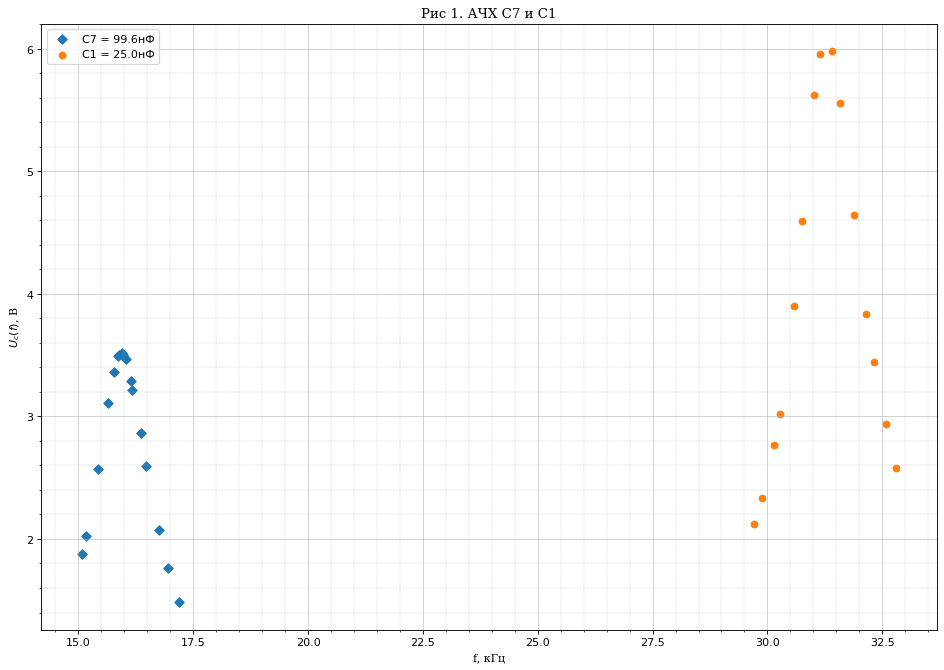

In [4]:
import pandas as pd
import mygraph as mg
import matplotlib.pyplot as plt

filename = 'c7ampl.tsv'
dfc7a = pd.read_csv(filename, sep='\t')
dfc7a.index = np.arange(1,18)
filename = 'c1ampl.tsv'
dfc1a = pd.read_csv(filename, sep='\t')
dfc1a.index = np.arange(1, 16)

figA = mg.make_figure()
ax = figA.add_subplot()
mg.set_grids(figA)
mg.set_label( ax, 'f, кГц', '$U_c(f)$, В' )
mg.set_title(ax, 'АЧХ C7 и C1')

ax.scatter( dfc7a['f, kHz'], dfc7a['U, V'], label='C7 = 99.6нФ', marker='D' )
ax.scatter( dfc1a['f, kHz'], dfc1a['U, V'], label='C1 = 25.0нФ' )
ax.legend()

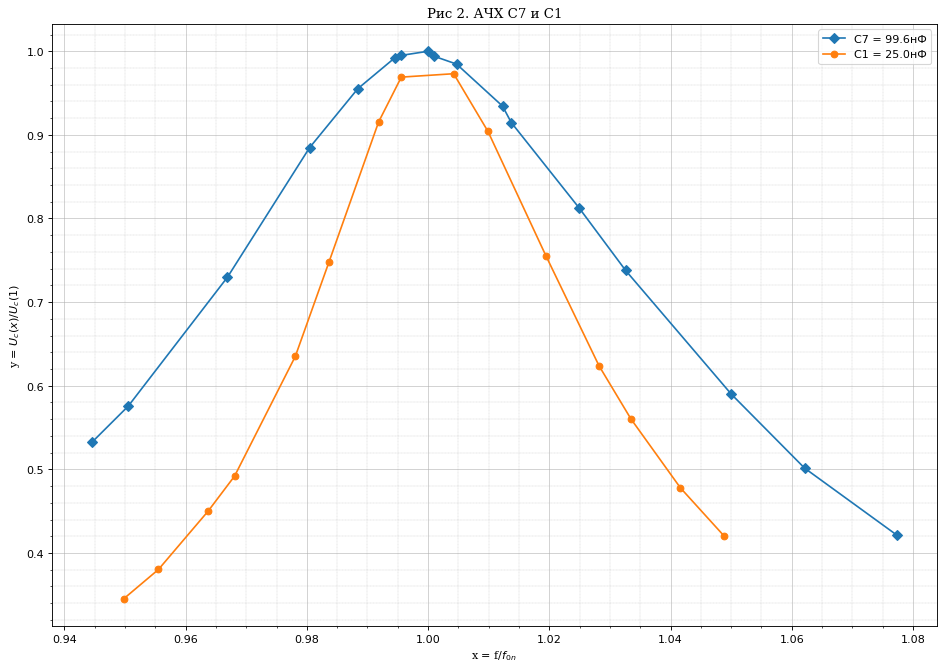

In [5]:
figB = mg.make_figure()
ax = figB.add_subplot()
mg.set_grids(figB)
mg.set_label( ax, 'x = f/$f_{0n}$', 'y = $U_c(x)/U_c(1)$' )
mg.set_title(ax, 'АЧХ C7 и C1')

f01 = 31.272
U01 = 6.144
f07 = 15.955
U07 = 3.5193

sorted_c7 = dfc7a.sort_values(by=['f, kHz'])    # So that plot draws correctly.
sorted_c1 = dfc1a.sort_values(by=['f, kHz']) 
ax.plot( sorted_c7['f, kHz'] / f07, sorted_c7['U, V'] / U07, label='C7 = 99.6нФ', marker='D' )
ax.plot( sorted_c1['f, kHz'] / f01, sorted_c1['U, V'] / U01, label='C1 = 25.0нФ', marker='o' )
ax.legend()

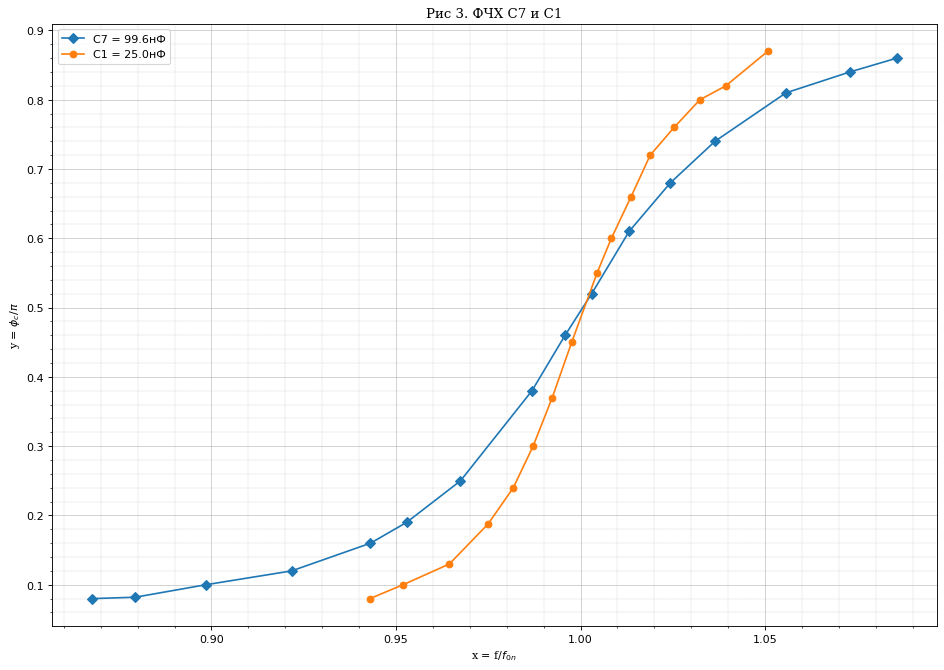

In [6]:
import pandas as pd
import mygraph as mg
import matplotlib.pyplot as plt

filename = 'c1phase.tsv'
dfc1ph = pd.read_csv(filename, sep='\t')
dfc1ph.index = np.arange(1,17)
filename = 'c7phase.tsv'
dfc7ph = pd.read_csv(filename, sep='\t')
dfc7ph.index = np.arange(1, 17)

figC = mg.make_figure()
ax = figC.add_subplot()
mg.set_grids(figC)
mg.set_label(ax, 'x = f/$f_{0n}$', 'y = $\phi_c/\pi$')
mg.set_title(ax, 'ФЧХ C7 и C1')

f01 = 31.272
f07 = 15.955
sorted_c7 = dfc7ph.sort_values(by=['f, kHz'])    # So that plot draws correctly.
sorted_c1 = dfc1ph.sort_values(by=['f, kHz']) 
ax.plot( sorted_c7['f, kHz'] / f07, sorted_c7['dphi'], label='C7 = 99.6нФ', marker='D' )
ax.plot( sorted_c1['f, kHz'] / f01, sorted_c1['dphi'], label='C1 = 25.0нФ', marker='o' )

ax.legend()